# Auswahl der Niederschalgsereignissen in 2014 bis 2024 

## Datenimport

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Set relevant data paths
events_path = 'events_FMO.csv'
P_path = 'P_FMO.csv'
save_folder = 'events_FMO'

# Read in data
P_events = pd.read_csv(events_path)
P_series = pd.read_csv(P_path)

# Order data in P_events by hN_mm
P_events_sort = P_events.sort_values('hN_mm')

# reset index of P_events_sort
P_events_sort = P_events_sort.reset_index(drop=True)



## Übersicht des Datensatzes der Niederschlagsereignisse

In [40]:
print(P_events_sort)

                    start                  end  hN_mm   iN_mean  iN_max  \
0     2023-12-06 10:20:00  2023-12-06 10:25:00   0.02  0.010000    0.02   
1     2017-02-17 12:40:00  2017-02-17 12:45:00   0.03  0.015000    0.03   
2     2022-04-10 11:35:00  2022-04-10 11:40:00   0.03  0.015000    0.03   
3     2016-02-20 16:55:00  2016-02-20 17:00:00   0.03  0.015000    0.03   
4     2019-01-11 21:10:00  2019-01-11 21:15:00   0.03  0.015000    0.03   
...                   ...                  ...    ...       ...     ...   
1748  2023-09-11 21:55:00  2023-09-12 09:20:00  38.95  0.282246    8.76   
1749  2015-08-15 19:15:00  2015-08-15 21:25:00  43.18  1.599259   11.26   
1750  2015-08-16 10:20:00  2015-08-18 02:15:00  68.97  0.143687    2.77   
1751  2016-06-23 16:50:00  2016-06-24 07:00:00  73.48  0.429708    9.10   
1752  2014-06-28 23:25:00  2014-06-30 05:55:00    NaN       NaN    0.18   

      hN_max_60       DN_h  
0          0.00   0.083333  
1          0.00   0.083333  
2          0

## Darstellung und Auswahl

Anzahl ausgewählter Ereignisse: 100
Davon auserhalb des Rasters: 43
Davon je Rasterzelle
+----+----+
| 14 | 14 |
+----+----+
| 14 | 15 |
+----+----+


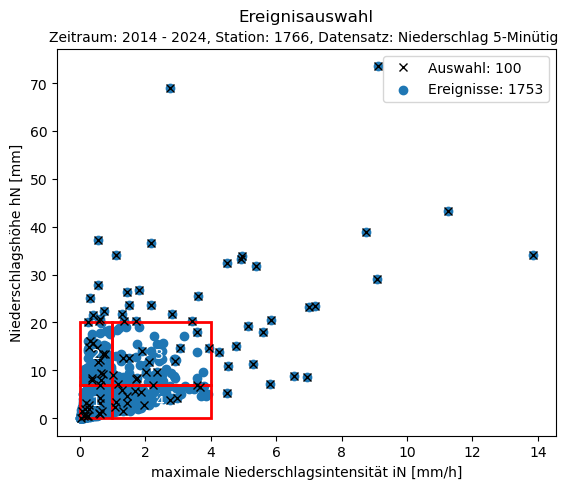

In [3]:
from tabulate import tabulate
P_20_4 = P_events_sort[(P_events_sort['hN_mm'] > 20) | (P_events_sort['iN_max'] > 4)]

n_events = [14,14,14,15]
hN_mm = [0, 7, 20]
iN_max = [0, 1, 4]
rs = 6

i = 0
j = 0
P_sample = pd.DataFrame()

for k in range(len(n_events)):

    selected_events = P_events_sort[(P_events_sort['iN_max'] >= iN_max[i]) & (P_events_sort['iN_max'] < iN_max[i+1]) & (P_events_sort['hN_mm'] >= hN_mm[j]) & (P_events_sort['hN_mm'] < hN_mm[j+1])]
    P_sample = pd.concat([P_sample, selected_events.sample(n_events[k-1], random_state=rs)])

    if k == 0:
        j += 1
    if k == 1:
        i += 1
    if k == 2:
        j -= 1

P_sample = pd.concat([P_sample, P_20_4])

# Plot hN_max_60 vs hN_mm with different symbols
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(P_sample['iN_max'], P_sample['hN_mm'], 'x', color='black', label='Sample')
ax.scatter(P_events_sort['iN_max'], P_events_sort['hN_mm'], marker='o',  label='Events')

ax.set_xlabel('maximale Niederschlagsintensität iN [mm/h]')
ax.set_ylabel('Niederschlagshöhe hN [mm]')
ax.set_title('Ereignisauswahl', pad=20)
ax.text(0.5, 1.03, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(labels=['Auswahl: {}'.format(len(P_sample)), 'Ereignisse: {}'.format(len(P_events_sort))])
ax.add_patch(Rectangle((0, 0), 1, 7, edgecolor='red', facecolor='none', lw=2))
ax.text(0.5, 3.5, '1', ha='center', va='center', color='white')
ax.add_patch(Rectangle((0, 7), 1, 13, edgecolor='red', facecolor='none', lw=2))
ax.text(0.5, 13.5, '2', ha='center', va='center', color='white')
ax.add_patch(Rectangle((1, 7), 3, 13, edgecolor='red', facecolor='none', lw=2))
ax.text(2.45, 13.5, '3', ha='center', va='center', color='white')
ax.add_patch(Rectangle((1, 0), 3, 7, edgecolor='red', facecolor='none', lw=2))
ax.text(2.45, 3.55, '4', ha='center', va='center', color='white')
plt.tight_layout()
print("Anzahl ausgewählter Ereignisse:", len(P_sample))

print("Davon auserhalb des Rasters:", len(P_20_4))

print("Davon je Rasterzelle")
table_data = [[14, 14], [14, 15]]

print(tabulate(table_data, tablefmt='grid'))

plt.show()



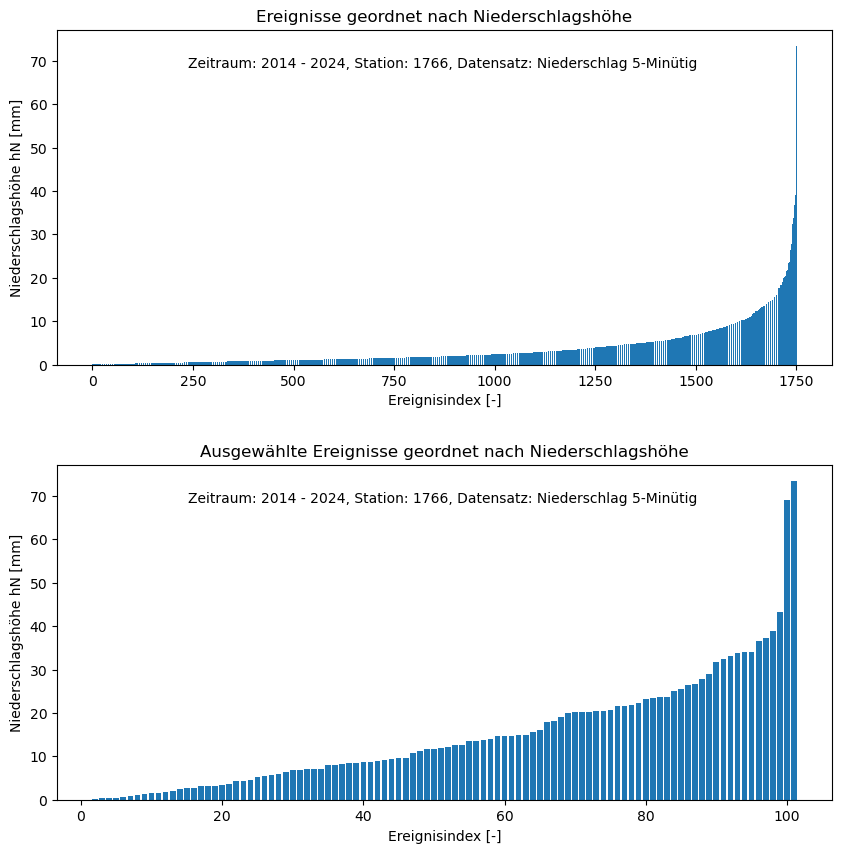

In [7]:
P_sample = P_sample.sort_values('hN_mm').reset_index(drop=True)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

xlabel = 'Ereignisindex [-]'
ylabel = 'Niederschlagshöhe hN [mm]'

plt.subplots_adjust(hspace=0.3)
axes[0].bar(P_events_sort.index, P_events_sort['hN_mm'])
axes[0].set_xlabel(xlabel)  # Add this line to label the x-axis
axes[0].set_ylabel(ylabel)
axes[0].set_title('Ereignisse geordnet nach Niederschlagshöhe')
axes[0].text(0.5, 0.9, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

axes[1].bar(P_sample.index + 2, P_sample['hN_mm'])
axes[1].set_xlabel(xlabel)  # Add this line to label the x-axis
axes[1].set_ylabel(ylabel)
axes[1].set_title('Ausgewählte Ereignisse geordnet nach Niederschlagshöhe')
axes[1].text(0.5, -0.4, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)

plt.show()

## Extrahieren der Eventdaten

In [ ]:
from extract_events import extract_events
extract_events(P_sample, P_series, save_folder)


In [5]:
print("Maximale Ereignisdauer: ", round(P_sample["DN_h"].max(),2), " h")

Maximale Ereignisdauer:  39.92  h
